## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

Per la lettura dei dati procedere nel seguente modo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Matrix, lambdify
from scipy.io import loadmat
import scipy as sp

def Lsolve(L,b):
    """  
    Risoluzione con procedura forward di Lx=b con L triangolare inferiore  
     Input: L matrice triangolare inferiore
            b termine noto
    Output: x: soluzione del sistema lineare
            flag=  0, se sono soddisfatti i test di applicabilità
                   1, se non sono soddisfatti
    """
    #test dimensione
    m,n=L.shape
    flag=0;
    if n != m:
        print('errore: matrice non quadrata')
        flag=1
        x=[]
        return x, flag
    
     # Test singolarita'
    if np.all(np.diag(L)) != True:
         print('el. diag. nullo - matrice triangolare inferiore')
         x=[]
         flag=1
         return x, flag
    # Preallocazione vettore soluzione
    x=np.zeros((n,1))
    
    for i in range(n):
         s=np.dot(L[i,:i],x[:i]) #scalare=vettore riga * vettore colonna
         x[i]=(b[i]-s)/L[i,i]
      
     
    return x,flag

def Usolve(U,b):
    
    """
    Risoluzione con procedura backward di Ux=b con U triangolare superiore  
     Input: U matrice triangolare superiore
            b termine noto
    Output: x: soluzione del sistema lineare
            flag=  0, se sono soddisfatti i test di applicabilità
                   1, se non sono soddisfatti
    
    """ 
    #test dimensione
    m,n=U.shape
    flag=0;
    if n != m:
        print('errore: matrice non quadrata')
        flag=1
        x=[]
        return x, flag
    
     # Test singolarita'
    if np.all(np.diag(U)) != True:
         print('el. diag. nullo - matrice triangolare superiore')
         x=[]
         flag=1
         return x, flag
    # Preallocazione vettore soluzione
    x=np.zeros((n,1))
    
    for i in range(n-1,-1,-1):
         s=np.dot(U[i,i+1:n],x[i+1:n]) #scalare=vettore riga * vettore colonna
         x[i]=(b[i]-s)/U[i,i]
      
     
    return x,flag

dati = loadmat('testI')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

m,n=A.shape
print('Dimensioni matrice: ',m,n)
def is_symmetric(A):
    return np.all(A.T==A)
print('Matrice è simmetrica?: ',is_symmetric(A))
def is_strictly_dominant(A):
    abs_A = np.abs(A)
    return np.all(2*np.diag(abs_A) > np.sum(abs_A, axis=1)) 
print('Matrice strettamente dominante: ',is_strictly_dominant(A))

Dimensioni matrice:  400 400
Matrice è simmetrica?:  False
Matrice strettamente dominante:  True


In [2]:
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=invM@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(autovalori) 
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(N@x0+b)/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [3]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A) 
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=E+D
    N=-F 
    T=np.linalg.inv(M)@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(autovalori)
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        x,flag=Lsolve(M,b-F@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet


Condizione matrice A=398.0942877444194; Calcolata Manualmente 398.0942877444195
raggio spettrale jacobi (0.4455170300779416+0j)
raggio spettrale Gauss-Seidel  (0.24514865550481996+0j)
Iterazioni jacobi 32, Iterazioni gauss seidel 19


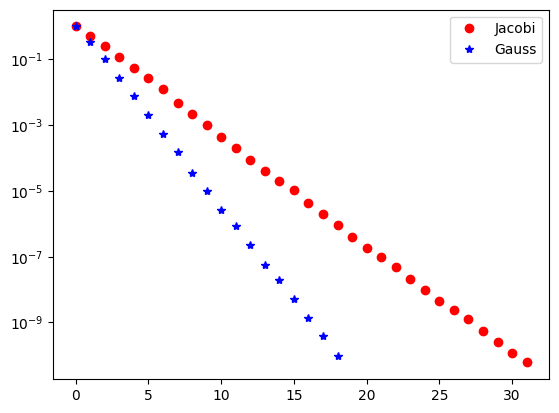

In [4]:
print('Condizione matrice A={}; Calcolata Manualmente {}'.format(np.linalg.cond(A),np.linalg.norm(A,2)*np.linalg.norm(np.linalg.inv(A),2)))
x0=np.zeros_like(b)
toll=1e-10
it_max=2000
xj,itj,er_vetj=jacobi(A,b,x0,toll,it_max)
xg,itg,er_vetg=gauss_seidel(A,b,x0,toll,it_max)
#print('Soluzione jacobi {}, Soluzione gauss seidel {}'.format(xj,xg))
print('Iterazioni jacobi {}, Iterazioni gauss seidel {}'.format(itj,itg))
plt.semilogy(range(len(er_vetj)),er_vetj,'ro',range(len(er_vetg)),er_vetg,'b*')
plt.legend(['Jacobi','Gauss'])
# Possiamo notare che il raggio spettrale del metodo di Jacobi è più grande del raggio spettrale del metodo di Gauss-Seidel
# Questo indica che il metodo di gauss arriva a convergenza più velocemente (è più efficiente)

- Data la matrice
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 6.0 & 3.0 & 2.0\\
2.0 & 1.0 & 4.0 & 3.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
- sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det)             **[punti: 2]**
- sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv)
                                                                                                    **[punti: 2]**

In [5]:
A1=np.array([[3,2,1,1],[4,6,3,2],[2,1,4,3],[1,4,2,7]])
b1=np.sum(A1,axis=1)

PT,L,U=sp.linalg.lu(A1)
# PA = LU
# det(PA)=det(P)det(A)
# det(LU)=det(L)det(U) (det(L)=1)
# det(U)=det(P)det(A) det(P)=(-1)^{scambi effettuati}
# det(A)=det(P)*u_ii
detA=np.prod(np.diag(U))*np.linalg.det(PT.T)
print('Determinante calcolato: {}, Determinante np {}'.format(detA,np.linalg.det(A1)))

Determinante calcolato: 210.0, Determinante np 210.00000000000014


In [6]:
def nsolve(A,B):
    m,n=A.shape
    if m!=n:
        print('Matrice non quadrata!')
        return None
    X=np.zeros((m,m))
    # Ly=Pb
    # Ux=y
    PT,L,U= sp.linalg.lu(A)
    P=PT.T.copy()

    for i in range(B.shape[0]):
        y,flag=Lsolve(L,P@B[:,i])
        x,flag=Usolve(U,y)
        X[:,i]=x.reshape(n,)
    return X

In [7]:
A1=np.array([[3,2,1,1],[4,6,3,2],[2,1,4,3],[1,4,2,7]])
invA1=nsolve(A1,np.eye(A1.shape[0]))
print(np.allclose(invA1,np.linalg.inv(A1)))
print(invA1,np.linalg.inv(A1))

True
[[ 0.56666667 -0.16666667  0.         -0.03333333]
 [-0.26190476  0.26190476 -0.14285714  0.02380952]
 [-0.34285714  0.14285714  0.28571429 -0.11428571]
 [ 0.16666667 -0.16666667  0.          0.16666667]] [[ 0.56666667 -0.16666667  0.         -0.03333333]
 [-0.26190476  0.26190476 -0.14285714  0.02380952]
 [-0.34285714  0.14285714  0.28571429 -0.11428571]
 [ 0.16666667 -0.16666667  0.          0.16666667]]


## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



In [18]:
def newton_rapshon(init_guess,f,J,tolx,tolf,nmax):
    X=np.array(init_guess, dtype=float)
    
    it=0
    errorf=1+tolf
    errorx=1+tolx
    error=[]

    while it<nmax and errorf>=tolf and errorx>=tolx:
        jx=J(X[0],X[1])
        
        if np.linalg.det(jx)==0:
            print("J-Matrix does not have max rank")
            return None,None,None
        
        fx=np.array(f(X[0],X[1]))
        fx=fx.squeeze()
        
        s=np.linalg.solve(jx,-fx)

        Xnew=X+s
        XnNorm=np.linalg.norm(Xnew,1)

        if XnNorm!=0:
            errorx=np.linalg.norm(s,1)/XnNorm
        else:
            errorx=np.linalg.norm(s,1)

        error.append(errorx)
        fnew=f(Xnew[0],Xnew[1])
        errorf=np.linalg.norm(fnew.squeeze(),1)

        X=Xnew
        it=it+1
    return X,it,error

In [19]:
def newton_rapshon_corde(init_guess,f,J,tolx,tolf,nmax):
    X=np.array(init_guess, dtype=float)
    
    it=0
    errorf=1+tolf
    errorx=1+tolx
    error=[]

    jx=J(X[0],X[1])
    while it<nmax and errorf>=tolf and errorx>=tolx:
        
        if np.linalg.det(jx)==0:
            print("J-Matrix does not have max rank")
            return None,None,None
        
        fx=np.array(f(X[0],X[1]))
        fx=fx.squeeze()
        
        s=np.linalg.solve(jx,-fx)

        Xnew=X+s
        XnNorm=np.linalg.norm(Xnew,1)

        if XnNorm!=0:
            errorx=np.linalg.norm(s,1)/XnNorm
        else:
            errorx=np.linalg.norm(s,1)

        error.append(errorx)
        fnew=f(Xnew[0],Xnew[1])
        errorf=np.linalg.norm(fnew.squeeze(),1)

        X=Xnew
        it=it+1
    return X,it,error

In [20]:
def newton_rapshon_sham(init_guess,f,J,tolx,tolf,nmax,num):
    X=np.array(init_guess, dtype=float)
    
    it=0
    errorf=1+tolf
    errorx=1+tolx
    error=[]

    while it<nmax and errorf>=tolf and errorx>=tolx:
        if it%num==0:
            jx=J(X[0],X[1])
        
            if np.linalg.det(jx)==0:
                print("J-Matrix does not have max rank")
                return None,None,None
        
        fx=np.array(f(X[0],X[1]))
        fx=fx.squeeze()
        
        s=np.linalg.solve(jx,-fx)

        Xnew=X+s
        XnNorm=np.linalg.norm(Xnew,1)

        if XnNorm!=0:
            errorx=np.linalg.norm(s,1)/XnNorm
        else:
            errorx=np.linalg.norm(s,1)

        error.append(errorx)
        fnew=f(Xnew[0],Xnew[1])
        errorf=np.linalg.norm(fnew.squeeze(),1)

        X=Xnew
        it=it+1
    return X,it,error

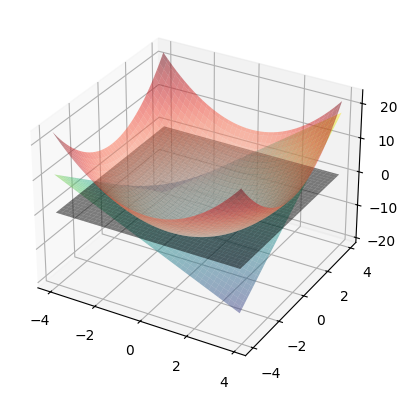

[-2.66631567 -1.37504937] [-2.66631567 -1.37504937] [-2.66631567 -1.37504937]


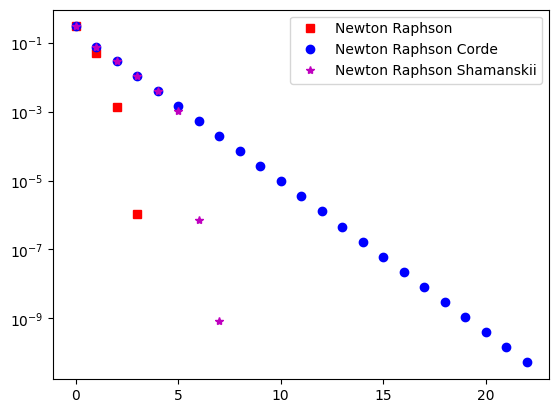

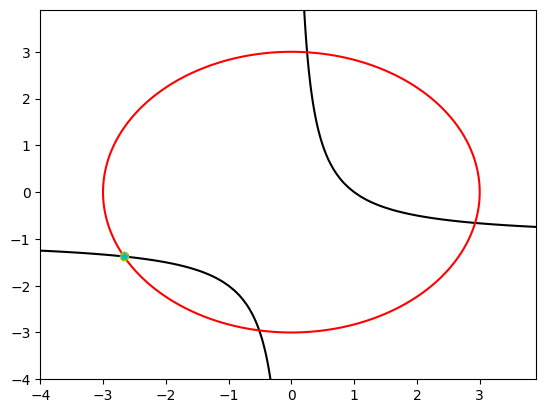

In [30]:
#Utili per il metodo di Newton_raphson per il calcolare il punto di minimo di un'equazione nonlineare in 2 variabili:
#Calcolo simbolico di matrice hessiana e vettore gradiente

x_sym, y_sym = symbols('x_sym y_sym')
#Esempio di funzione non lineare simbolica
F_sym=0.5*(0.001*(x_sym-1)**2+(x_sym**2-y_sym)**2)

#Calcolo vettore gradiente
grad_f = sym.derive_by_array(F_sym, (x_sym,y_sym))

# Calcolo dell'Hessiana con sympy.hessian
H = sym.hessian(F_sym, (x_sym,y_sym))

# Conversione delle espressioni simboliche in funzioni numeriche
grad_f_func = sym.lambdify((x_sym,y_sym), grad_f, 'numpy')
H_func = sym.lambdify((x_sym,y_sym), H, 'numpy')
F_func=sym.lambdify((x_sym,y_sym), F_sym, 'numpy')



#Utili per il metodo di Newton Raphson per risolvere un sistema di equazioni non lineari

#Scrivere in froma simbolica le due equazioni del sistema, ad esempio
#x_0\cdot x_1+x_0=1 \\
#x_0^2+x_1^2=9
f1_sym = lambda x_sym,y_sym: x_sym*y_sym+x_sym-1   #[-1,1]
f2_sym= lambda x_sym,y_sym: x_sym**2+y_sym**2-9


#Definitre il vettore di Funzioni
def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)

#Disegnare superfici e curve di livello per determinare la stima dell'iterato iniziale
#Esempio 
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.show()


initial_guess=[-2,-1]
tolX=1e-10
tolF=1e-10
max_iterations=200
update=5

Xn,it,errore=newton_rapshon(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
Xc,itc,errorec=newton_rapshon_corde(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
Xs,its,errores=newton_rapshon_sham(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations,update)
print(Xn,Xc,Xs)
plt.semilogy(range(len(errore)),errore,'rs',range(len(errorec)),errorec,'bo',range(len(errores)),errores,'m*')
plt.legend(['Newton Raphson','Newton Raphson Corde','Newton Raphson Shamanskii'])
plt.show()
#Plot superifici di controllo
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
plt.plot(Xn[0],Xn[1],'y*',Xc[0],Xc[1],'yo',Xs[0],Xs[1],'c*',)
plt.show()


## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche x

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

•	Minimizzare la funzione obiettivo x

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

•	Valutare se una macchina dimostra un comportamento intelligente x

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

•	CNN, GAN e Transformers x

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

•	CNN, Expert Systems e Transformers


**5.** A cosa serve il validation set?

•	A trovare i migliori iperparametri del modello x

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**

Il ruolo del learning rate è quello di "spostare" i pesi di una distanza ottimale nella direzione corretta (Antigradiente).

> Step Decay

Lo step decay provoca una diminuizione del learning rate ogni numero predefinito di epoche:
$$\eta=\eta_0\cdot\delta^{\lfloor n/s \rfloor}$$

> Exponential Decay

Provoca una diminuizione del learning rate in maniera esponenziale:
$\eta=\eta_0e^{-\delta \cdot n}$

> Time Decay

Provoca una diminuizione del learning rate in base alle singole esecuzioni ($n$):
$\eta=\frac{\eta_0}{1+\delta\cdot n}$

Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**

L'equazione di aggiornamento dei pesi è pressochè uguale per tutti i metodi e consiste nella seguente formula:

$$w_j^{k+1}=w_j^k-\displaystyle\frac{\eta}{\sqrt{s_j^k+\varepsilon}}\cdot \nabla C(w_j^k)$$
>Adagrad

Adagrad adatta il learning rate ai parametri eseguendo aggiornamenti più grandi per parametri poco frequenti e aggiornamenti più piccoli per quelli frequenti
- Utilizza la somma dei gradienti al quadrato per il calcolo del learning rate

> RMSProp

Root Mean Square Propagation
Come Adagrad ma al posto della somma dei gradienti al quadrato si utilizza una media ponderata esponenziale per ridurre la diminuzione aggressiva del learning rate.
- Maggiore stabilità e convergenza più affidabile

> ADAM

Adam unisce i vantaggi di RMSProp e il metodo del momentum.
- Usa la media ponderata esponenziale dei gradienti ai passi precedenti per ottenere una stima del momento del gradiente per ogni parametro

Adatta in modo dinamico il learning rate per ciascun parametro del modello utilizzando le stime del momentum del primo e del secondo grado.